# ゼロから作る Deep Learning 4 強化学習編 勉強ノート 第3章 〜ベルマン方程式〜

ここでは、確率的に振る舞う MDP において成り立つ最も重要な方程式である「<font color="red">**ベルマン方程式**</font>」について扱う。

## ベルマン方程式とは

ベルマン方程式(Bellman Equation)の導出を行う上で、その下準備として確率と期待値について軽く触れる。

### ベルマン方程式の導出

次のような問題を考える。  

1. サイコロを振る
2. 出た目が偶数であれば確率0.8で表が出るコインを、奇数であれば確率0.5で表が出るコインを投げる
3. 投げたコインが表の場合は最初に出たサイコロの目の数を、裏の場合は0を報酬として受け取る

これの期待値は

\begin{eqnarray*}
&& \frac{1}{6} \cdot \frac{1}{2} \cdot 1 + \frac{1}{6} \cdot \frac{1}{2} \cdot 0 + \frac{1}{6} \cdot \frac{4}{5} \cdot 2 + \frac{1}{6} \cdot \frac{1}{5} \cdot 0 + \frac{1}{6} \cdot \frac{1}{2} \cdot 3 + \frac{1}{6} \cdot \frac{1}{2} \cdot 0 + \\
&& \frac{1}{6} \cdot \frac{4}{5} \cdot 4 + \frac{1}{6} \cdot \frac{1}{5} \cdot 0 + \frac{1}{6} \cdot \frac{1}{2} \cdot 5 + \frac{1}{6} \cdot \frac{1}{2} \cdot 0 + \frac{1}{6} \cdot \frac{4}{5} \cdot 6 + \frac{1}{6} \cdot \frac{1}{5} \cdot 0 \\
&=& 2.35
\end{eqnarray*}

となる。  
ここで、この計算を文字式で表すと次のようになる。  
サイコロの目を $x$ として、コインの結果(表か裏)を $y$ とする。  
具体的な条件付き確率 $p(y|x)$ は、例えば次のようになる。

\begin{eqnarray*}
p(y = \text{表} | x = 4) &=& 0.8 \\
p(y = \text{裏} | x = 3) &=& 0.5
\end{eqnarray*}

また、 $x$ と $y$ が同時に起こる確率(<font color="red">**同時確率**</font>)は、

$$p(x, y) = p(x)p(y|x)$$

である。  
この問題については、 $x$ と $y$ の値によって貰える報酬が決まるので、報酬は関数 $r(x, y)$ として表すことができる。  
例えば、

\begin{eqnarray*}
r(x = 4, y = \text{表}) &=& 4 \\
r(x = 3, y = \text{裏}) &=& 0
\end{eqnarray*}

のようになる。  
期待値は、値とその値が起こる確率の積の総和なので、

\begin{eqnarray*}
\mathbb{E}[r(x, y)] &=& \sum_x \sum_y p(x, y) r(x, y) \\
&=& \sum_x \sum_y p(x) p(y|x) r(x, y)
\end{eqnarray*}

となる。  
以降、 $\sum_x \sum_y$ という表記は $\sum_{x, y}$ とまとめることにする。

ここからは、いよいよベルマン方程式の導出に入る。  
第2章で定義した「収益」は次のようなものだった。

$$G_t = R_t + \gamma R_{t+1} + \gamma^2 R_{t+2} + \cdots$$

ここで、 $t+1$ の式を考えると

\begin{eqnarray*}
G_t &=& R_t + \gamma R_{t+1} + \gamma^2 R_{t+2} + \cdots \\
&=& R_t + \gamma \left( R_{t+1} + \gamma R_{t+2} + \cdots \right) \\
&=& R_t + \gamma G_{t+1}
\end{eqnarray*}

という $G_t$ と $G_{t+1}$ の関係式が導かれる。  
状態価値関数の中に代入すると、期待値の線形性より

\begin{eqnarray*}
v_{\pi}(s) &=& \mathbb{E}_\pi[G_t | S_t = s] \\
&=& \mathbb{E}_\pi[R_t + \gamma G_{t+1} | S_t = s] \\
&=& \mathbb{E}_\pi[R_t | S_t = s] + \gamma \mathbb{E}_\pi[G_{t+1} | S_t = s]
\end{eqnarray*}

となる。  
今、状態が $s$ であり、エージェントは方策 $\pi(a|s)$ に従って行動する。  
そして、状態遷移確率 $p(s'|s, a)$ に従って新しい状態 $s'$ に移行する。  
最後に、報酬が $r(s, a, s')$ という関数により決定するという状況である。  
よって、期待値 $\mathbb{E}_\pi[R_t | S_t = s]$ は次のような式で表される。

$$\mathbb{E}_\pi[R_t | S_t = s] = \sum_{a, s'} \pi(a|s) p(s'|s, a) r(s, a, s')$$

さて、続いて期待値 $\mathbb{E}_\pi[G_{t+1} | S_t = s]$ について考えたいが、これは時刻 $t$ のとき、1つ先の時刻 $t+1$ における収益の期待値を表している。  
まず、時刻 $t+1$ のときの状態価値関数は次のように表せる。

$$v_{\pi}(s') = \mathbb{E}_\pi[G_{t+1} | S_{t+1} = s']$$

ここで、時刻 $t$ で状態 $s$ を取り、時刻 $t+1$ で状態 $s'$ に遷移することを考える。  
確率 $\pi(a|s)$ で行動 $a$ を選択し、確率 $p(s'|s, a)$ で状態 $s'$ に遷移するので、期待値 $\mathbb{E}_\pi[G_{t+1} | S_t = s]$ を求めるためにはこの計算を全ての候補に対して行い、総和を求める。

\begin{eqnarray*}
\mathbb{E}_\pi[G_{t+1} | S_t = s] &=& \sum_{a, s'} \pi(a|s) p(s'|s, a) \mathbb{E}_\pi[G_{t+1} | S_{t+1} = s']\\
&=& \sum_{a, s'} \pi(a|s) p(s'|s, a) v_{\pi}(s')
\end{eqnarray*}

よって、状態価値関数は

\begin{eqnarray*}
v_{\pi}(s) &=& \mathbb{E}_\pi[R_t | S_t = s] + \gamma \mathbb{E}_\pi[G_{t+1} | S_t = s] \\
&=& \sum_{a, s'} \pi(a|s) p(s'|s, a) r(s, a, s') + \gamma \sum_{a, s'} \pi(a|s) p(s'|s, a) v_{\pi}(s') \\
&=& \sum_{a, s'} \pi(a|s) p(s'|s, a) \left\{ r(s, a, s') + \gamma v_{\pi}(s') \right\}
\end{eqnarray*}

となり、これがベルマン方程式である。

### ベルマン方程式の例(*コーディング*)

ここではまた2マスのグリッドワールドを考える。  
エージェントは、等確率で左右に動くとする。

In [1]:
# ライブラリのインポート
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# グリッドワールドを作成する関数を定義
# 0: 進める道, 1: 障害物, 2: スタート, 3: ゴール, 4: 加点ポイント, 5: 減点ポイント
def create_grid_world(
        rows: int, cols: int,
        start: set, goal: set,
        obstacles: list, items: dict, enemies: dict
    ):
    grid = np.zeros((rows, cols))
    points = np.zeros((rows, cols), dtype=int)

    for obs in obstacles:
        grid[obs] = 1

    grid[start] = 2
    if goal != ():
        grid[goal] = 3

    for item, point in items.items():
        grid[item] = 4
        points[item] = point

    for enemy, point in enemies.items():
        grid[enemy] = 5
        points[enemy] = point

    return grid, points


# グリッドワールドを描画する関数を定義
def draw_grid_world(grid, points, figsize_x, figsize_y):
    rows, cols = grid.shape
    fig = plt.figure(figsize=(figsize_x, figsize_y), tight_layout=True)
    ax = fig.subplots()

    ax.matshow(grid, vmin=-0.5, vmax=5)

    ax.set_xticks(np.arange(-.5, cols, 1), minor=True)
    ax.set_yticks(np.arange(-.5, rows, 1), minor=True)
    ax.grid(which="minor", color="black", linestyle="-", linewidth=2)

    for (i, j), val in np.ndenumerate(grid):
        if val == 1:
            ax.text(
                j, i, "X", ha="center", va="center",
                color="yellow", fontsize=16, fontweight="bold"
            )
        elif val == 2:
            ax.text(
                j, i, "S", ha="center", va="center",
                color="red", fontsize=16, fontweight="bold"
            )
        elif val == 3:
            ax.text(
                j, i, "G", ha="center", va="center",
                color="blue", fontsize=16, fontweight="bold"
            )
        elif val == 4:
            ax.text(
                j, i, f"+{points[i, j]}", ha="center", va="center",
                color="white", fontsize=16, fontweight="bold"
            )
        elif val == 5:
            ax.text(
                j, i, f"{points[i, j]}", ha="center", va="center",
                color="black", fontsize=16, fontweight="bold"
            )

    ax.set_xticks([])
    ax.set_yticks([])

    plt.show()

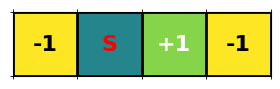

In [3]:
# グリッドワールドのパラメータを設定
rows, cols = 1, 4
start = (0, 1)
goal = ()
obstacles = []
items = {(0, 2): +1}
enemies = {(0, 0): -1, (0, 3): -1}

# グリッドワールドを作成して描画
grid, points = create_grid_world(
    rows, cols, start, goal, obstacles, items, enemies
)
draw_grid_world(grid, points, cols, rows)

$v_\pi(s = (0, 1))$ は、状態が(0, 1)でランダムな方策 $\pi$ に従って行動したときに得られる収益の期待値である。  
ベルマン方程式を使ってこれを表してみる。

\begin{eqnarray*}
v_{\pi}(s) &=& \sum_{a, s'} \pi(a|s) p(s'|s, a) \left\{ r(s, a, s') + \gamma v_{\pi}(s') \right\} \\
&=& \sum_{a} \pi(a|s) \sum_{s'} p(s'|s, a) \left\{ r(s, a, s') + \gamma v_{\pi}(s') \right\}
\end{eqnarray*}

状態は決定論的に遷移するので、 $p(s'|s, a)$ は $s'$ に遷移するときに1でそれ以外は0になる。  
よって上記の式はシンプルに

$$v_{\pi}(s) = \sum_{a} \pi(a|s) \left\{ r(s, a, s') + \gamma v_{\pi}(s') \right\}$$

となる。

それでは具体的に問題に当てはめてみる。  
状態(0, 1)から確率0.5で行動 Left を選択し、また状態(0, 1)に戻ってくる(このときの報酬は-1)。  
割引率 $\gamma$ を0.9とすると行動 Left を選択したときの式は次のようになる。

$$\pi(\text{Left}|(0, 1)) \left\{ r((0, 1), \text{Left}, (0, 1)) + \gamma v_{\pi}((0, 1)) \right\} = 0.5\left\{ -1 + 0.9 v_{\pi}((0, 1)) \right\}$$

また、確率0.5で行動 Right を選択し、状態(0.2)に遷移する(報酬は1)。  
同じく割引率 $\gamma$ を0.9とすると行動 Right を選択したときの式は次のようになる。

$$\pi(\text{Right}|(0, 1)) \left\{ r((0, 1), \text{Right}, (0, 2)) + \gamma v_{\pi}((0, 2)) \right\} = 0.5\left\{ 1 + 0.9 v_{\pi}((0, 2)) \right\}$$

以上の2パターンが考えられるので、ベルマン方程式は

$$v_{\pi}((0, 1)) = 0.5\left\{ -1 + 0.9 v_{\pi}((0, 1)) \right\} + 0.5\left\{ 1 + 0.9 v_{\pi}((0, 2)) \right\}$$

であり、これを整理すると

$$-0.55 v_{\pi}((0, 1)) + 0.45 v_{\pi}((0, 2)) = 0$$

となる。  
同様に、状態(0, 2)からのベルマン方程式を考えると、

$$v_{\pi}((0, 2)) = 0.5\left\{ 0 + 0.9 v_{\pi}((0, 1)) \right\} + 0.5\left\{ -1 + 0.9 v_{\pi}((0, 2)) \right\}$$

であり、整理すると

$$0.45 v_{\pi}((0, 1)) - 0.55 v_{\pi}((0, 2)) = 0.5$$

となる。  
よって連立方程式

\begin{equation}
\left\{ \,
    \begin{aligned}
    -0.55 v_{\pi}((0, 1)) + 0.45 v_{\pi}((0, 2)) &= 0 \\
    0.45 v_{\pi}((0, 1)) - 0.55 v_{\pi}((0, 2)) &= 0.5
    \end{aligned}
\right.
\end{equation}

を解くと、

\begin{equation}
\left\{ \,
    \begin{aligned}
    v_{\pi}((0, 1)) &= -2.25 \\
    v_{\pi}((0, 2)) &= -2.75
    \end{aligned}
\right.
\end{equation}

ということが分かる。  
これがランダムな方策における状態価値関数になる。

## 行動価値関数とベルマン方程式

ここでは新たに<font color="red">**行動価値関数**</font>(Action-Value Function)について説明する。  
これを慣例として <font color="red">**Q 関数**</font>(Q Function)ということもある。

### Q 関数とは

状態が $s$ で方策が $\pi$ のとき、状態価値関数は

$$v_{\pi}(s) = \mathbb{E}_\pi[G_t | S_t = s]$$

と定義された。  
ここに、行動 $a$ の条件を加えたものが Q 関数である。  
数式で表すと次のようなものである。

$$q_{\pi}(s, a) = \mathbb{E}_\pi[G_t | S_t = s, A_t = a]$$

これは、時刻 $t$ のときに状態 $s$ で行動 $a$ を取り、時刻 $t+1$ 以降では方策 $\pi$ に従った行動を取り、そのときに得られる収益の期待値を表している。  
ここで、 $q_{\pi}(s, a)$ の行動 $a$ は方策 $\pi$ とは無関係なことに注意する。

### Q 関数に関するベルマン方程式

状態価値関数に倣って Q 関数を展開すると、

\begin{eqnarray*}
q_{\pi}(s, a) &=& \mathbb{E}_\pi[G_t | S_t = s, A_t = a] \\
&=& \mathbb{E}_\pi[R_t + \gamma G_{t+1} | S_t = s, A_t = a] \\
&=& \mathbb{E}_\pi[R_t | S_t = s, A_t = a] + \gamma \mathbb{E}_\pi[G_{t+1} | S_t = s, A_t = a]
\end{eqnarray*}

であり、状態 $s$ と行動 $a$ が決まっていることを考慮すると、

\begin{eqnarray*}
q_{\pi}(s, a) &=& \mathbb{E}_\pi[R_t | S_t = s, A_t = a] + \gamma \mathbb{E}_\pi[G_{t+1} | S_t = s, A_t = a] \\
&=& \sum_{s'} p(s'|s, a) r(s, a, s') + \gamma \sum_{s'} p(s'|s, a) v_{\pi}(s') \\
&=& \sum_{s'} p(s'|s, a) \left\{ r(s, a, s') + \gamma v_{\pi}(s') \right\} \\
&=& \sum_{s'} p(s'|s, a) \left\{ r(s, a, s') + \gamma \sum_{a'} \pi (a'|s') q_{\pi}(s', a') \right\}
\end{eqnarray*}

としてベルマン方程式が表せる。

## ベルマン最適方程式

ベルマン方程式は、ある方策 $\pi$ に関して成り立つ方程式だが、最適方策ももちろんベルマン方程式を満たす。  
ここでは、最適方策に関して成り立つ<font color="red">**ベルマン最適方程式**</font>(Bellman Optimality Equation)について説明する。

### 状態価値関数におけるベルマン最適方程式

ベルマン方程式は次のように表された。

\begin{eqnarray*}
v_{\pi}(s) &=& \sum_{a, s'} \pi(a|s) p(s'|s, a) \left\{ r(s, a, s') + \gamma v_{\pi}(s') \right\} \\
&=& \sum_{a} \pi(a|s) \sum_{s'} p(s'|s, a) \left\{ r(s, a, s') + \gamma v_{\pi}(s') \right\}
\end{eqnarray*}

ベルマン方程式はどの方策を取っても成り立つので、最適方策を $\pi_*(a|s)$ とすると次のベルマン方程式が成り立つ。

$$v_*(s) = \sum_{a} \pi_*(a|s) \sum_{s'} p(s'|s, a) \left\{ r(s, a, s') + \gamma v_*(s') \right\}$$

ここで考えたいのは、最適方策 $\pi_*(a|s)$ によって選ばれる行動 $a$ についてである。  
まず行動が複数あり、その中の最適な行動を $a_*$ とすると、最適方策はこれを100%選択することになるので、確率的方策 $\pi_*(a|s)$ は決定論的方策として考えることができる。   
すなわち、最適方策は $\sum_{s'} p(s'|s, a) \left\{ r(s, a, s') + \gamma v_*(s') \right\}$ の値が最適の行動を選択し、その最大値がそのまま $v_*(s)$ になる。  
これを数式で表すと、

$$v_*(s) = \max_a \sum_{s'} p(s'|s, a) \left\{ r(s, a, s') + \gamma v_*(s') \right\}$$

となる。

### Q 関数におけるベルマン最適方程式

Q 関数についても状態価値関数と同様にベルマン最適方程式を求められる。  
まず、 Q 関数におけるベルマン方程式は

$$q_{\pi}(s, a) = \sum_{s'} p(s'|s, a) \left\{ r(s, a, s') + \gamma \sum_{a'} \pi (a'|s') q_{\pi}(s', a') \right\}$$

で表された。  
こちらも最適方策を $\pi_*(a|s)$ とすると次のベルマン方程式が成り立つ。

$$q_*(s, a) = \sum_{s'} p(s'|s, a) \left\{ r(s, a, s') + \gamma \sum_{a'} \pi_* (a'|s') q_*(s', a') \right\}$$

$\pi_*$ は最適方策なので、先ほど同様に $\max$ 演算子を用いると、

$$q_*(s, a) = \sum_{s'} p(s'|s, a) \left\{ r(s, a, s') + \gamma \max_{a'} q_*(s', a') \right\}$$

として Q 関数におけるベルマン最適方程式が表せる。

## ベルマン最適方程式の例

先ほどの2マスのグリッドワールドの問題を再度考える。

### ベルマン最適方程式の適用

まず、ベルマン最適方程式は次のように数式で表せた。

$$v_*(s) = \max_a \sum_{s'} p(s'|s, a) \left\{ r(s, a, s') + \gamma v_*(s') \right\}$$

さらに、状態遷移が確率的でなく決定論的な場合は次のように簡略化できる。

$$v_*(s) = \max_a \left\{ r(s, a, s') + \gamma v_*(s') \right\}$$

これを2マスのグリッドワールドに適用する。  
ここで、割引率 $\gamma$ を0.9とする。

\begin{equation}
v_*((0, 1)) = \max \left\{ \,
    \begin{aligned}
    -1 + 0.9 v_*((0, 1))&, \\
    1 + 0.9 v_*((0, 2))&
    \end{aligned}
\right\} \\
v_*((0, 2)) = \max \left\{ \,
    \begin{aligned}
    0.9 v_*((0, 1))&, \\
    -1 + 0.9 v_*((0, 2))&
    \end{aligned}
\right\}
\end{equation}

この連立方程式の解は

\begin{eqnarray*}
v_*((0, 1)) &=& 5.26 \\
v_*((0, 2)) &=& 4.73
\end{eqnarray*}

となる。  
これは $\max$ 関数を使っているため、線形なソルバーでは解くことができない。  
一方、非線形なソルバーを使うことでこのような場合でも解くことができる。

### 最適方策を得る

2マスのグリッドワールドのような小さな問題であれば、ベルマン最適方程式は直接解くことができる。  
しかし、最終的に知りたいのは最適方策である。  
ここでは最適 Q 関数 $q_*(s, a)$ が分かっていると仮定する。  
このとき、状態 $s$ における最適な行動は、

$$
\newcommand{\argmax}{\mathop{\rm arg~max}\limits}
\mu_*(s) = \argmax_a q_*(s, a)
$$

によって得られる。  
また、

$$q_{\pi}(s, a) = \sum_{s'} p(s'|s, a) \left\{ r(s, a, s') + \gamma v_{\pi}(s') \right\}$$

が成り立つので、上記の式に代入すると

$$
\newcommand{\argmax}{\mathop{\rm arg~max}\limits}
\mu_*(s) = \argmax_a \sum_{s'} p(s'|s, a) \left\{ r(s, a, s') + \gamma v_*(s') \right\}
$$

と、最適状態価値関数 $v_*(s)$ を使って最適方策 $\mu_*(s)$ を得ることができる。

それでは、この式を使って2マスのグリッドワールドの問題の最適方策を求めてみる。  
まずは状態(0, 1)における最適な行動を求める。  
行動 Left を取ると

\begin{eqnarray*}
\sum_{s'} p(s'|s, a) \left\{ r(s, a, s') + \gamma v_*(s') \right\} &=& r(s, a, s') + \gamma v_*(s') \\
&=& -1 + 0.9 \cdot 5.26 \\
&=& 3.734
\end{eqnarray*}

であり、行動 Right を取ると

\begin{eqnarray*}
\sum_{s'} p(s'|s, a) \left\{ r(s, a, s') + \gamma v_*(s') \right\} &=& r(s, a, s') + \gamma v_*(s') \\
&=& 1 + 0.9 \cdot 4.73 \\
&=& 5.257
\end{eqnarray*}

になる。  
よって状態(0, 1)における最適な行動は Right であると分かる。  
同様に状態(0, 2)における最適な行動を求めると Left になる。  
以上から、状態(0, 1)にいるときは右に、状態(0, 2)にいるときは左に進むことが最適方策となる。